In [3]:
# import statements
import pandas as pd
import pickle
import joblib
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# read dataset
dataset = pd.read_csv('flightdata.csv')
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [5]:
dataset.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [6]:
dataset.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
Unnamed: 25            float64
dtype: object

VISUALIZATION OF DATA

In [7]:
# removing irrelevant data
dataset = dataset.drop(['Unnamed: 25', 'UNIQUE_CARRIER'], axis=1)

In [8]:
# find exact value counts of all fields
cat_cols = dataset.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    dataset[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))


counts
column   value         
DEST     JFK       1312
         SEA       1994
         DTW       2211
         MSP       2493
         ATL       3221
...                 ...
TAIL_NUM N582NW      72
         N584NW      72
         N581NW      73
         N856DN      75
         N857DZ      76

[799 rows x 1 columns]

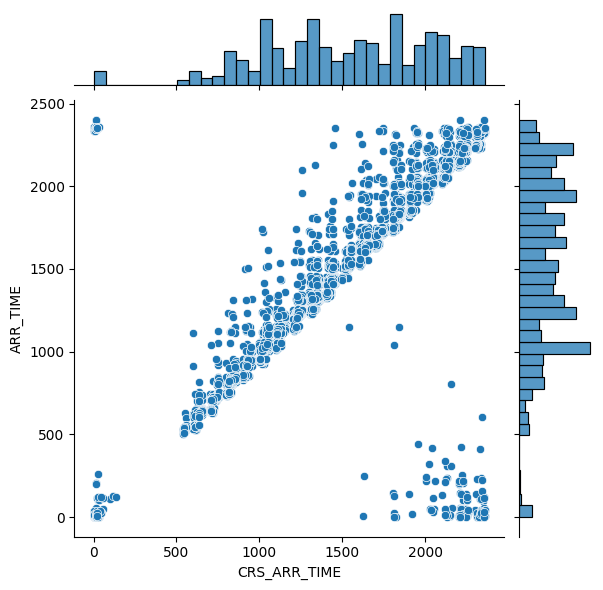

In [9]:
#plotting correlations (implication - almost linear relationship)
sb.jointplot(data=dataset, x="CRS_ARR_TIME", y="ARR_TIME")

In [10]:
# creating a copy of the dataset for visualization

dataset_visualization = dataset.copy()

In [11]:
dataset_visualization.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
dtype: object

In [12]:
# convert all object data to numeric values to visualize on heatmap

list_str_obj_cols = dataset_visualization.columns[dataset_visualization.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    dataset_visualization[str_obj_col] = pd.to_numeric(dataset_visualization[str_obj_col], errors='coerce') 
dataset_visualization.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
TAIL_NUM               float64
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                 float64
DEST_AIRPORT_ID          int64
DEST                   float64
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
dtype: object

<AxesSubplot: >

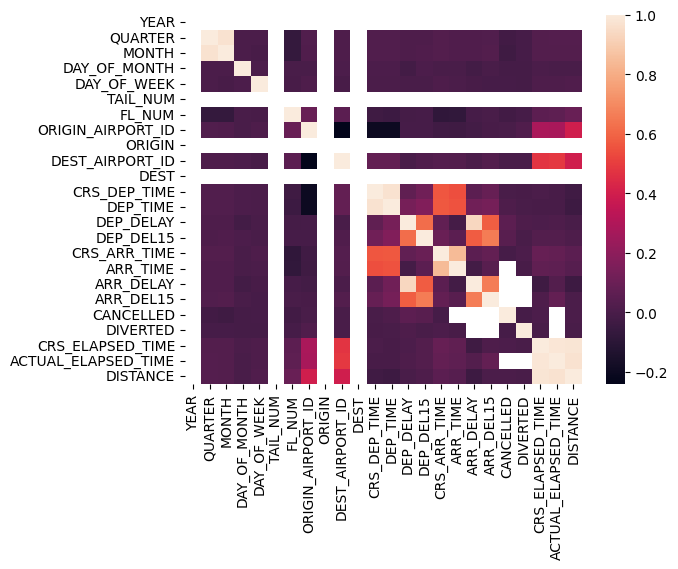

In [13]:
correlations = dataset_visualization.corr()
sb.heatmap(correlations)

In [14]:
# to identify the correlations between arrival delay and other fields
correlations['ARR_DEL15']

YEAR                        NaN
QUARTER                0.023102
MONTH                  0.030161
DAY_OF_MONTH          -0.000597
DAY_OF_WEEK           -0.012063
TAIL_NUM                    NaN
FL_NUM                -0.002378
ORIGIN_AIRPORT_ID     -0.006250
ORIGIN                      NaN
DEST_AIRPORT_ID        0.029525
DEST                        NaN
CRS_DEP_TIME           0.086057
DEP_TIME               0.127593
DEP_DELAY              0.578529
DEP_DEL15              0.658511
CRS_ARR_TIME           0.078282
ARR_TIME               0.042298
ARR_DELAY              0.661322
ARR_DEL15              1.000000
CANCELLED                   NaN
DIVERTED                    NaN
CRS_ELAPSED_TIME       0.015676
ACTUAL_ELAPSED_TIME    0.077741
DISTANCE               0.002870
Name: ARR_DEL15, dtype: float64

DATA PREPROCESSING

In [15]:
# based on the correlation factors
refined_dataset = dataset.drop(['YEAR', 'QUARTER', 'DAY_OF_WEEK', 'TAIL_NUM', 'FL_NUM', 
                                'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_ELAPSED_TIME', 
                                'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'ORIGIN',
                                'DEST', 'ARR_TIME', 'ARR_DELAY'], axis=1)
refined_dataset

,MONTH,DAY_OF_MONTH,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED
0,1,1,1905,1907.0,2.0,0.0,2143,0.0,0.0,0.0
1,1,1,1345,1344.0,-1.0,0.0,1435,0.0,0.0,0.0
2,1,1,940,942.0,2.0,0.0,1215,0.0,0.0,0.0
3,1,1,819,820.0,1.0,0.0,1335,0.0,0.0,0.0
4,1,1,2300,2256.0,-4.0,0.0,607,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11226,12,30,1005,1003.0,-2.0,0.0,1223,0.0,0.0,0.0
11227,12,30,1525,1559.0,34.0,1.0,2046,0.0,0.0,0.0
11228,12,30,1959,1959.0,0.0,0.0,2210,0.0,0.0,0.0
11229,12,30,1530,1529.0,-1.0,0.0,1806,0.0,0.0,0.0


In [16]:
# check datatypes of columns
refined_dataset.dtypes

MONTH             int64
DAY_OF_MONTH      int64
CRS_DEP_TIME      int64
DEP_TIME        float64
DEP_DELAY       float64
DEP_DEL15       float64
CRS_ARR_TIME      int64
ARR_DEL15       float64
CANCELLED       float64
DIVERTED        float64
dtype: object

In [17]:
# finding missing values
refined_dataset.isna().sum()

MONTH             0
DAY_OF_MONTH      0
CRS_DEP_TIME      0
DEP_TIME        107
DEP_DELAY       107
DEP_DEL15       107
CRS_ARR_TIME      0
ARR_DEL15       188
CANCELLED         0
DIVERTED          0
dtype: int64

In [18]:
# imputing missing values with mean
cols = ["DEP_TIME", "DEP_DELAY","DEP_DEL15","ARR_DEL15"]
refined_dataset[cols]=refined_dataset[cols].fillna(refined_dataset.mode().iloc[0])

In [19]:
refined_dataset.isna().sum()

MONTH           0
DAY_OF_MONTH    0
CRS_DEP_TIME    0
DEP_TIME        0
DEP_DELAY       0
DEP_DEL15       0
CRS_ARR_TIME    0
ARR_DEL15       0
CANCELLED       0
DIVERTED        0
dtype: int64

In [20]:
refined_dataset.shape

(11231, 10)

In [21]:
# converting float values to categorical
columns = ['DEP_DEL15', 'CANCELLED', 'DIVERTED', 'ARR_DEL15']
for col in columns:
    refined_dataset[col] = refined_dataset[col].astype('int').astype('category')
refined_dataset.dtypes

MONTH              int64
DAY_OF_MONTH       int64
CRS_DEP_TIME       int64
DEP_TIME         float64
DEP_DELAY        float64
DEP_DEL15       category
CRS_ARR_TIME       int64
ARR_DEL15       category
CANCELLED       category
DIVERTED        category
dtype: object

In [22]:
# converting float values to categorical
columns = ['DEP_TIME', 'DEP_DELAY']
for col in columns:
    refined_dataset[col] = refined_dataset[col].astype('int')
refined_dataset.dtypes

MONTH              int64
DAY_OF_MONTH       int64
CRS_DEP_TIME       int64
DEP_TIME           int32
DEP_DELAY          int32
DEP_DEL15       category
CRS_ARR_TIME       int64
ARR_DEL15       category
CANCELLED       category
DIVERTED        category
dtype: object

PREPARING FOR TRAINING

In [23]:
# split dependent and independent variables
X = refined_dataset[[ 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',     
                  'DEP_DEL15', 'CRS_ARR_TIME']]     
Y = refined_dataset[['ARR_DEL15']]

In [24]:
 # splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train.value_counts()

ARR_DEL15
0            6594
1             930
dtype: int64

In [25]:
# decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier = decision_tree_classifier.fit(X_train,y_train)
decision_tree_prediction = decision_tree_classifier.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(decision_tree_prediction, y_test))
print("Classification report\n", classification_report(decision_tree_prediction, y_test))
print("Accuracy score\n", accuracy_score(decision_tree_prediction, y_test))

Confusion matrix
 [[3109  172]
 [ 153  273]]
Classification report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3281
           1       0.61      0.64      0.63       426

    accuracy                           0.91      3707
   macro avg       0.78      0.79      0.79      3707
weighted avg       0.91      0.91      0.91      3707

Accuracy score
 0.912328028055031


In [26]:
# svc model
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(SVC_prediction, y_test))
print("Classification report\n", classification_report(SVC_prediction, y_test))
print("Accuracy score\n", accuracy_score(SVC_prediction, y_test))

c:\Users\shrey\anaconda3\envs\flight\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
 [[3258  333]
 [   4  112]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      3591
           1       0.25      0.97      0.40       116

    accuracy                           0.91      3707
   macro avg       0.63      0.94      0.68      3707
weighted avg       0.98      0.91      0.93      3707

Accuracy score
 0.9090909090909091


In [27]:
# knn model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(KNN_prediction, y_test))
print("Classification report\n", classification_report(KNN_prediction, y_test))
print("Accuracy score\n", accuracy_score(KNN_prediction, y_test))

c:\Users\shrey\anaconda3\envs\flight\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix
 [[3219  212]
 [  43  233]]
Classification report
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      3431
           1       0.52      0.84      0.65       276

    accuracy                           0.93      3707
   macro avg       0.76      0.89      0.80      3707
weighted avg       0.95      0.93      0.94      3707

Accuracy score
 0.9312112220124089


In [28]:
# gaussian naive bayes model
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
GNB_prediction = GNB_model.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(GNB_prediction, y_test))
print("Classification report\n", classification_report(GNB_prediction, y_test))
print("Accuracy score\n", accuracy_score(GNB_prediction, y_test))

Confusion matrix
 [[3080  101]
 [ 182  344]]
Classification report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      3181
           1       0.77      0.65      0.71       526

    accuracy                           0.92      3707
   macro avg       0.86      0.81      0.83      3707
weighted avg       0.92      0.92      0.92      3707

Accuracy score
 0.9236579444294578


c:\Users\shrey\anaconda3\envs\flight\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Logistic Regression

LR_model = LogisticRegression(random_state=0).fit(X_train, y_train)
LR_prediction=LR_model.predict(X_test)
print("Confusion matrix\n", confusion_matrix(LR_prediction, y_test))
print("Classification report\n", classification_report(LR_prediction, y_test))
print("Accuracy score\n", accuracy_score(LR_prediction, y_test))

c:\Users\shrey\anaconda3\envs\flight\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
 [[3225  182]
 [  37  263]]
Classification report
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3407
           1       0.59      0.88      0.71       300

    accuracy                           0.94      3707
   macro avg       0.79      0.91      0.84      3707
weighted avg       0.96      0.94      0.95      3707

Accuracy score
 0.9409225789047747


In [30]:
# ensemble model of best 3 peforming model - gnb, knn, svc
ensemble = VotingClassifier(estimators=[('gnb', GNB_model), ('knn', KNN_model), ('lr', LR_model)], voting='hard')
ensemble.fit(X_train, y_train)
ensemble_prediction = ensemble.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(ensemble_prediction, y_test))
print("Classification report\n", classification_report(ensemble_prediction, y_test))
print("Accuracy score\n", accuracy_score(ensemble_prediction, y_test))

c:\Users\shrey\anaconda3\envs\flight\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shrey\anaconda3\envs\flight\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
 [[3213  164]
 [  49  281]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      3377
           1       0.63      0.85      0.73       330

    accuracy                           0.94      3707
   macro avg       0.81      0.90      0.85      3707
weighted avg       0.95      0.94      0.95      3707

Accuracy score
 0.9425411383868357


In [31]:
joblib.dump(ensemble, 'flight.pkl')

['flight.pkl']